In [59]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [60]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '8fb9e6ef69ce4145a8c96cb9f0dbe2a3' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [61]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')

for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    defeat = 0
    
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            try:
                if int(f['result']['goalsHomeTeam']) < int(f['result']['goalsAwayTeam']):
                    defeat += 1
            except TypeError:
                pass
        else:
            try:
                if int(f['result']['goalsAwayTeam']) < int(f['result']['goalsHomeTeam']):
                    defeat += 1
            except TypeError:
                pass
    team['defeat'] = defeat
    print('Team "{}", {} defeats'.format(team['name'], defeat))

Team "FC Rio Ave", 13 defeats
Team "FC Porto", 5 defeats
Team "Moreirense FC", 18 defeats
Team "FC Paços de Ferreira", 18 defeats
Team "Sporting CP", 7 defeats
Team "Maritimo Funchal", 13 defeats
Team "CD Tondela", 16 defeats
Team "SL Benfica", 9 defeats
Team "Boavista Porto FC", 15 defeats
Team "FC Arouca", 0 defeats
Team "Vitoria Setubal", 16 defeats
Team "C.F. Os Belenenses", 15 defeats
Team "Vitoria Guimaraes", 17 defeats
Team "Sporting Braga", 7 defeats
Team "GD Estoril Praia", 20 defeats
Team "Feirense", 21 defeats
Team "Nacional Funchal", 0 defeats
Team "G.D. Chaves", 13 defeats


In [62]:
team_for_pd = []
cost_team = [22150000, 223100000, 14950000, 15900000, 202500000, 19000000, 13850000, 178400000, 15950000, 6500000, 18100000, 17700000, 34700000, 9100000, 19250000, 12450000, 0, 19500000]
i = 0
for team in teams:
    team_for_pd.append({'name': team['name'], 'defeats': team['defeat'], 'cost': cost_team[i]})
    i += 1
team_for_pd

[{'cost': 22150000, 'defeats': 13, 'name': 'FC Rio Ave'},
 {'cost': 223100000, 'defeats': 5, 'name': 'FC Porto'},
 {'cost': 14950000, 'defeats': 18, 'name': 'Moreirense FC'},
 {'cost': 15900000, 'defeats': 18, 'name': 'FC Paços de Ferreira'},
 {'cost': 202500000, 'defeats': 7, 'name': 'Sporting CP'},
 {'cost': 19000000, 'defeats': 13, 'name': 'Maritimo Funchal'},
 {'cost': 13850000, 'defeats': 16, 'name': 'CD Tondela'},
 {'cost': 178400000, 'defeats': 9, 'name': 'SL Benfica'},
 {'cost': 15950000, 'defeats': 15, 'name': 'Boavista Porto FC'},
 {'cost': 6500000, 'defeats': 0, 'name': 'FC Arouca'},
 {'cost': 18100000, 'defeats': 16, 'name': 'Vitoria Setubal'},
 {'cost': 17700000, 'defeats': 15, 'name': 'C.F. Os Belenenses'},
 {'cost': 34700000, 'defeats': 17, 'name': 'Vitoria Guimaraes'},
 {'cost': 9100000, 'defeats': 7, 'name': 'Sporting Braga'},
 {'cost': 19250000, 'defeats': 20, 'name': 'GD Estoril Praia'},
 {'cost': 12450000, 'defeats': 21, 'name': 'Feirense'},
 {'cost': 0, 'defeats': 

In [63]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd = teams_pd[['name', 'cost', 'defeats']]
teams_pd

,name,cost,defeats
0,FC Rio Ave,22150000,13
1,FC Porto,223100000,5
2,Moreirense FC,14950000,18
3,FC Paços de Ferreira,15900000,18
4,Sporting CP,202500000,7
5,Maritimo Funchal,19000000,13
6,CD Tondela,13850000,16
7,SL Benfica,178400000,9
8,Boavista Porto FC,15950000,15
9,FC Arouca,6500000,0


## Кластеризация футбольных команд по стоимости и количеству проигрышей

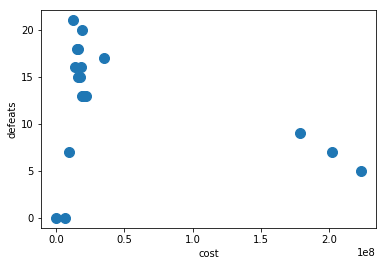

In [64]:
teams_pd.plot.scatter(x='cost', y='defeats', s=100)

In [65]:
del teams_pd['name']
teams_pd

,cost,defeats
0,22150000,13
1,223100000,5
2,14950000,18
3,15900000,18
4,202500000,7
5,19000000,13
6,13850000,16
7,178400000,9
8,15950000,15
9,6500000,0


In [94]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[0.31720893, 2.10231472],
       [3.19500278, 0.80858258],
       [0.21409812, 2.9108973 ],
       [0.22770302, 2.9108973 ],
       [2.89999132, 1.13201562],
       [0.27209795, 2.10231472],
       [0.19834509, 2.58746427],
       [2.55485655, 1.45544865],
       [0.22841907, 2.42574775],
       [0.09308614, 0.        ],
       [0.2592091 , 2.58746427],
       [0.25348072, 2.42574775],
       [0.49693678, 2.74918079],
       [0.1303206 , 1.13201562],
       [0.27567819, 3.23433034],
       [0.17829576, 3.39604685],
       [0.        , 0.        ],
       [0.27925842, 2.10231472]])

In [146]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[0.2667276 , 2.6278934 ],
        [0.07446891, 0.37733854],
        [2.88328355, 1.13201562]]),
 array([0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]))

In [147]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'g',
 'r',
 'r',
 'r',
 'g',
 'r',
 'r',
 'g',
 'r']

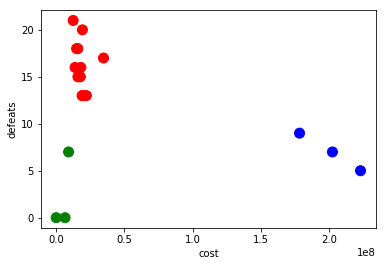

In [148]:
teams_pd.plot.scatter(x='cost', y='defeats', c=colors, s=100)

In [170]:
centroids, cluster_map = kmeans2(whitened, 5)
sum(centroids), cluster_map

(array([6.48980465, 7.32575821]),
 array([4, 2, 0, 0, 1, 4, 4, 1, 4, 3, 4, 4, 0, 4, 0, 0, 3, 4]))

In [171]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['m',
 'b',
 'r',
 'r',
 'g',
 'm',
 'm',
 'g',
 'm',
 'y',
 'm',
 'm',
 'r',
 'm',
 'r',
 'r',
 'y',
 'm']

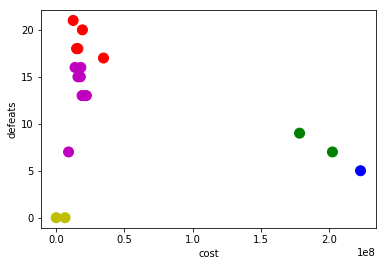

In [172]:
teams_pd.plot.scatter(x='cost', y='defeats', c=colors, s=100)